In [2]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
import warnings

# Filter out the specific warning
warnings.filterwarnings("ignore")

In [1]:
for i in range(5):
    print(i)
    i=[4,5,6]

0
1
2
3
4


In [ ]:
[]

In [58]:
landmark_model_path="face_landmarker.task"
BaseOptions = mp.tasks.BaseOptions
FaceLandmarker = mp.tasks.vision.FaceLandmarker
FaceLandmarkerOptions = mp.tasks.vision.FaceLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

def get_landmark(c_image):
    options = FaceLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=landmark_model_path),
    running_mode=VisionRunningMode.IMAGE,
    output_face_blendshapes=True
    )

    with FaceLandmarker.create_from_options(options) as landmarker:
        face_landmarker_result = landmarker.detect(c_image)
    return face_landmarker_result

def calc_coordinate(face_landmarker_result):
    coordinates=[]
    for land in face_landmarker_result.face_landmarks:
        for j in range(0,len(land),1):
            i=land[j]
            #if(True):
            if(i.x>0.32 and i.x<0.5 and i.y>0.70 and i.y<0.82):            
                coordinates.append(j)
    return coordinates
    

In [66]:
#im=cv2.imread('/ssd_scratch/cvit/souvikg544/gridcorpus/faces/s1/swbp1a/1.jpg')
im=cv2.imread('test.jpg')
im=cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=im)

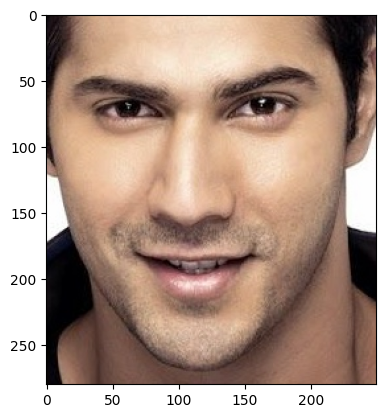

In [67]:
plt.imshow(im)

In [68]:
landmarker1=get_landmark(mp_image)

W20230915 15:50:12.538977 12470 face_landmarker_graph.cc:168] Face blendshape model contains CPU only ops. Sets FaceBlendshapesGraph acceleration to Xnnpack.


In [30]:
# r=np.load("/ssd_scratch/cvit/souvikg544/gridcorpus/landmarks/s10/swbz3s/2_landmark.npy")
# b=np.load("/ssd_scratch/cvit/souvikg544/gridcorpus/landmarks/s10/swbz3s/2_blend.npy")

In [62]:
coordinates=calc_coordinate(landmarker1)

In [63]:
len(coordinates)

122

In [21]:
#landmarker1.face_landmarks

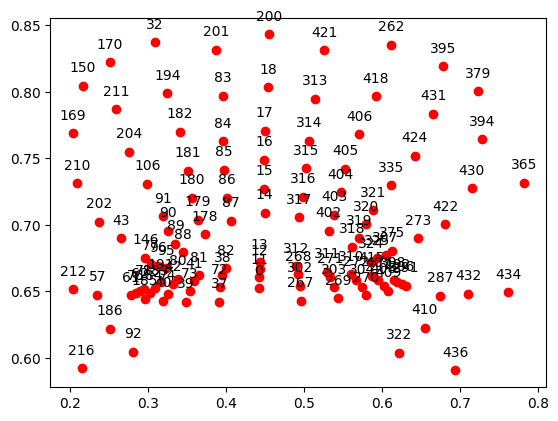

In [70]:
xval = []
yval = []
for land in landmarker1.face_landmarks:
    #print(type(land.landmark))
    count = 0
    for j in range(0,len(land),1):
        i=land[j]
        #if(i.x>0.30 and i.x<0.5 and i.y>0.65 and i.y>0.68):
        if(j in coordinates):
            xval.append(i.x)
            yval.append(i.y)
            plt.annotate(str(j), (i.x, i.y), textcoords="offset points", xytext=(0,10), ha='center')
plt.scatter(xval, yval, color = 'red')
#plt.scatter(xS, yS, color = 'red')
plt.show()

In [71]:
len(coordinates)

122

In [72]:
# Saving the lists to a pickel
import pickle
file_name_landmark = '../landmark_index_lip.pkl'
# Open the file in binary write mode
with open(file_name_landmark, 'wb') as file:
    pickle.dump(coordinates, file)


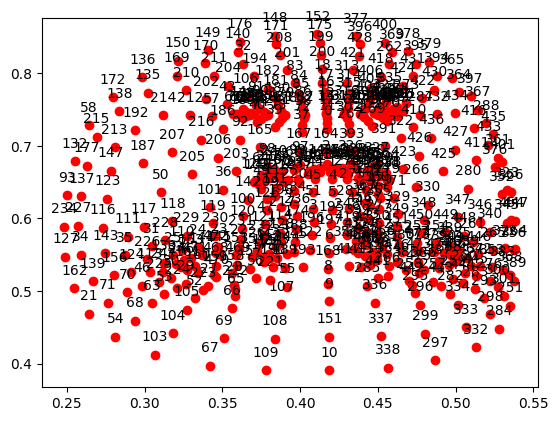

In [65]:
xval = []
yval = []
for land in landmarker1.face_landmarks:
    #print(type(land.landmark))
    count = 0
    for j in range(0,len(land),1):
        i=land[j]        
        xval.append(i.x)
        yval.append(i.y)
        plt.annotate(str(j), (i.x, i.y), textcoords="offset points", xytext=(0,10), ha='center')
plt.scatter(xval, yval, color = 'red')
#plt.scatter(xS, yS, color = 'red')
plt.show()

In [16]:
res=np.empty((0, 3), dtype=float)
land=landmarker1.face_landmarks[0]
for j in range(0,len(land),1):
    i=land[j]
    #if(j in coordinates):
    row=np.array([i.x,i.y,i.z])
    res = np.vstack((res, row))

In [31]:
cap = cv2.VideoCapture("/ssd_scratch/cvit/souvikg544/gridcorpus/video/s10/swbz3s.mpg")
if not cap.isOpened():
    print("Error: Could not open video ------")
    
k=0    
while cap.isOpened():
    k+=1
    ret, frame = cap.read()
    if not ret:
        break
    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    if(k==2):
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame)
        landmarker1=get_landmark(mp_image)
        res=np.empty((0, 3), dtype=float)
        land=landmarker1.face_landmarks[0]
        for j in range(0,len(land),1):
            i=land[j]
            #if(j in coordinates):
            row=np.array([i.x,i.y,i.z])
            res = np.vstack((res, row))
        

W20230910 15:35:47.165069 23500 face_landmarker_graph.cc:168] Face blendshape model contains CPU only ops. Sets FaceBlendshapesGraph acceleration to Xnnpack.


In [32]:
res==r

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       ...,
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [33]:
r

array([[ 0.49106419,  0.72974384, -0.0226196 ],
       [ 0.49008533,  0.67089075, -0.06720425],
       [ 0.49078646,  0.68347973, -0.02922201],
       ...,
       [ 0.54922312,  0.50932485, -0.00874855],
       [ 0.53650212,  0.5265255 , -0.00876791],
       [ 0.55100632,  0.5413928 , -0.00876618]])

In [34]:
res

array([[ 0.49106419,  0.72974384, -0.0226196 ],
       [ 0.49008533,  0.67089075, -0.06720425],
       [ 0.49078646,  0.68347973, -0.02922201],
       ...,
       [ 0.54922312,  0.50932485, -0.00874855],
       [ 0.53650212,  0.5265255 , -0.00876791],
       [ 0.55100632,  0.5413928 , -0.00876618]])

In [17]:
res.shape

(478, 3)

In [18]:
r.shape

(478, 3)

In [19]:
res

array([[ 0.48702151,  0.72449154, -0.02405683],
       [ 0.48544851,  0.66966742, -0.06797143],
       [ 0.4864251 ,  0.6818729 , -0.03102886],
       ...,
       [ 0.55101258,  0.50783396, -0.00784945],
       [ 0.53808701,  0.52550691, -0.00786943],
       [ 0.55306578,  0.54074496, -0.00786675]])

In [20]:
r

array([[ 0.48714069,  0.72631264, -0.02383878],
       [ 0.48721233,  0.67149448, -0.06806704],
       [ 0.48780996,  0.68344498, -0.03083999],
       ...,
       [ 0.54936785,  0.50963521, -0.00812169],
       [ 0.53659666,  0.52685177, -0.00814099],
       [ 0.55106634,  0.54188907, -0.00813915]])

In [47]:
res

array([[ 0.49079716,  0.72621948, -0.0225082 ],
       [ 0.48720205,  0.66815984, -0.06736074],
       [ 0.48883128,  0.68101853, -0.02940187],
       ...,
       [ 0.55141139,  0.50796813, -0.00948957],
       [ 0.53871155,  0.52534914, -0.00950905],
       [ 0.55374992,  0.54012072, -0.0095063 ]])

In [36]:
res

array([[ 0.49079716,  0.72621948, -0.0225082 ],
       [ 0.48720205,  0.66815984, -0.06736074],
       [ 0.48883128,  0.68101853, -0.02940187],
       ...,
       [ 0.55141139,  0.50796813, -0.00948957],
       [ 0.53871155,  0.52534914, -0.00950905],
       [ 0.55374992,  0.54012072, -0.0095063 ]])

In [19]:
res

array([[ 0.49077883,  0.72924101, -0.02248444],
       [ 0.48897776,  0.67111087, -0.06702496],
       [ 0.48995933,  0.68372351, -0.02924952],
       ...,
       [ 0.55036485,  0.50957608, -0.00857734],
       [ 0.53772283,  0.52665871, -0.00859665],
       [ 0.55211365,  0.54150295, -0.00859494]])

In [13]:
res

array([[ 0.49077883,  0.72924101, -0.02248444],
       [ 0.48897776,  0.67111087, -0.06702496],
       [ 0.48995933,  0.68372351, -0.02924952],
       ...,
       [ 0.55036485,  0.50957608, -0.00857734],
       [ 0.53772283,  0.52665871, -0.00859665],
       [ 0.55211365,  0.54150295, -0.00859494]])

In [14]:
r

array([[ 0.4906739 ,  0.72999173, -0.02247951],
       [ 0.48905966,  0.67107588, -0.06697604],
       [ 0.4899973 ,  0.68378544, -0.02919763],
       ...,
       [ 0.54960632,  0.50976127, -0.00864078],
       [ 0.53692806,  0.52691472, -0.0086602 ],
       [ 0.55138582,  0.54180545, -0.0086584 ]])

In [36]:
res=res.flatten()

In [37]:
res.shape

(438,)

In [38]:
l_frames=np.vstack((res, res1))

In [39]:
l_frames.shape

(2, 292)

In [14]:
landmarker1.face_blendshapes[0]

[Category(index=0, score=3.3309540867776377e-06, display_name='', category_name='_neutral'),
 Category(index=1, score=0.10940620303153992, display_name='', category_name='browDownLeft'),
 Category(index=2, score=0.20021206140518188, display_name='', category_name='browDownRight'),
 Category(index=3, score=0.0004481876385398209, display_name='', category_name='browInnerUp'),
 Category(index=4, score=0.023553084582090378, display_name='', category_name='browOuterUpLeft'),
 Category(index=5, score=0.00864497385919094, display_name='', category_name='browOuterUpRight'),
 Category(index=6, score=0.00013099981879349798, display_name='', category_name='cheekPuff'),
 Category(index=7, score=5.789301553704718e-07, display_name='', category_name='cheekSquintLeft'),
 Category(index=8, score=2.488868346972595e-07, display_name='', category_name='cheekSquintRight'),
 Category(index=9, score=0.04858328402042389, display_name='', category_name='eyeBlinkLeft'),
 Category(index=10, score=0.074641317129

In [37]:
res3=np.array([])
for fb in landmarker1.face_blendshapes[0]:
    #if(fb.index in blend_indexes):
    res3=np.append(res3,fb.score)

In [38]:
res3

array([2.18471632e-06, 2.37062559e-01, 2.23162100e-01, 9.66556254e-04,
       1.39604611e-02, 5.84818935e-03, 5.36867992e-05, 3.20754680e-07,
       2.24690808e-07, 2.57738978e-02, 3.17484997e-02, 1.80105641e-02,
       2.16817260e-02, 4.60626092e-03, 3.13925117e-01, 2.93288171e-01,
       1.43559035e-02, 3.34172279e-01, 3.22098851e-01, 4.77729827e-01,
       3.20229053e-01, 2.01692525e-02, 1.03107775e-02, 1.96740482e-04,
       2.01696274e-03, 1.99521393e-01, 4.02052276e-04, 4.38440703e-02,
       6.82764105e-04, 2.95947818e-03, 5.00225695e-04, 4.39714000e-04,
       1.23562990e-02, 4.34008631e-04, 4.54117917e-03, 3.35334125e-03,
       7.79852085e-03, 1.60187706e-02, 6.24505877e-02, 1.48273655e-03,
       6.69647753e-03, 1.69435292e-02, 1.10887375e-03, 3.26347118e-03,
       2.49141303e-04, 2.94435071e-04, 1.47194706e-03, 1.57891645e-03,
       5.41358750e-05, 9.23103362e-05, 3.68739450e-07, 8.26692087e-07])

In [21]:
res3

array([2.17235038e-06, 1.93216205e-01, 2.12026700e-01, 6.39312435e-04,
       1.86366718e-02, 8.00776947e-03, 5.22619375e-05, 1.84934947e-07,
       2.67193087e-07, 3.39098461e-02, 3.65756117e-02, 3.33986953e-02,
       3.77464034e-02, 9.76195280e-03, 2.11849734e-01, 2.18052179e-01,
       1.98446568e-02, 2.17616394e-01, 2.10562959e-01, 4.64240074e-01,
       3.32000136e-01, 1.65740699e-02, 7.95205869e-03, 1.52462031e-04,
       2.99916998e-03, 2.39682615e-01, 3.13460740e-04, 6.95814788e-02,
       1.00925996e-03, 3.10403761e-03, 2.09994963e-04, 2.10508180e-04,
       5.53409848e-03, 4.97790403e-04, 3.82976653e-03, 3.39567289e-03,
       1.59113407e-02, 2.16646325e-02, 2.78599616e-02, 1.50218979e-03,
       6.39840448e-03, 2.91609671e-02, 1.65116100e-03, 2.38748617e-03,
       2.26859018e-04, 2.43814939e-04, 8.67318304e-04, 1.17611489e-03,
       5.83241854e-05, 9.92650166e-05, 3.61822657e-07, 7.13469376e-07])

In [39]:
b

array([2.02545039e-06, 1.69997439e-01, 2.06334859e-01, 6.68385066e-04,
       2.11838745e-02, 8.12288746e-03, 5.05759854e-05, 1.83743381e-07,
       2.55543114e-07, 3.55624855e-02, 3.80766727e-02, 3.25327031e-02,
       3.58113013e-02, 1.30875381e-02, 1.79976627e-01, 1.85358122e-01,
       2.31544282e-02, 2.23798513e-01, 2.18716323e-01, 4.64953303e-01,
       3.36105853e-01, 1.57676730e-02, 7.69373262e-03, 1.52294349e-04,
       2.43238430e-03, 2.34436616e-01, 3.79409001e-04, 7.44781569e-02,
       9.25837725e-04, 3.58459190e-03, 1.73696448e-04, 1.71171851e-04,
       5.59728267e-03, 4.14326933e-04, 4.13180096e-03, 3.61175882e-03,
       1.57290474e-02, 2.44074110e-02, 2.85139401e-02, 1.89204304e-03,
       6.60702493e-03, 3.07439547e-02, 1.51094806e-03, 2.05591321e-03,
       2.17480527e-04, 2.52913451e-04, 8.08836194e-04, 1.16015156e-03,
       4.88903133e-05, 8.79397412e-05, 3.51449927e-07, 6.34863397e-07])

In [16]:
blend_indexes=[]
for fb in landmarker2.face_blendshapes[0]:
    if("mouth" in fb.category_name or "jaw" in fb.category_name or "cheek" in fb.category_name):
        blend_indexes.append(fb.index)
    

In [18]:
# Saving the lists to a pickel
import pickle
file_name_landmark = '../landmark_index.pkl'
file_name_blend = '../blend_index.pkl'

# Open the file in binary write mode
with open(file_name_landmark, 'wb') as file:
    pickle.dump(coordinates, file)

with open(file_name_blend, 'wb') as file:
    pickle.dump(blend_indexes, file)

print("Files saved")


Files saved


In [40]:
len(blend_indexes)

30

In [38]:
for fb in landmarker2.face_blendshapes[0]:
    if(fb.index in blend_indexes):
        res=np.append(res,fb.score)

In [39]:
res.shape

(468,)

In [41]:
frames=np.empty((0, 468), dtype=float)

In [43]:
frames=np.vstack((frames,res))

In [44]:
frames.shape

(1, 468)

In [18]:
import os
import torch
from torch.utils.data import Dataset, DataLoader,SubsetRandomSampler
from torchvision import transforms
import cv2
import numpy as np
import glob
from torchtext.vocab import vocab
from collections import Counter, OrderedDict
import pickle
import warnings

# Set a simple filter to ignore all warnings
warnings.simplefilter('ignore')


class lipnet_data(Dataset):
    def __init__(self, root_folder):
        self.root_folder_faces =  os.path.join(root_folder,"faces")
        self.root_folder_transcription= os.path.join(root_folder,"transcription")
        self.frames_folder=glob.glob(os.path.join(self.root_folder_faces,"**/*"), 
                   recursive = False)
        #print(self.frames_folder)
        
        file_name_vocab = '../vocab_dict.pkl'
        file_name_landmark = '../landmark_index.pkl'
        file_name_blend = '../blend_index.pkl'

        # Open the file in binary read mode
        with open(file_name_vocab, 'rb') as file:
            self.v1 = pickle.load(file)            
        with open(file_name_landmark, 'rb') as file:
            self.coordinates = pickle.load(file)
        with open(file_name_blend, 'rb') as file:
            self.blend_index = pickle.load(file)

        self.landmark_model_path="face_landmarker.task"
        self.BaseOptions = mp.tasks.BaseOptions
        self.FaceLandmarker = mp.tasks.vision.FaceLandmarker
        self.FaceLandmarkerOptions = mp.tasks.vision.FaceLandmarkerOptions
        self.VisionRunningMode = mp.tasks.vision.RunningMode

    def get_landmark(self,c_image):
        options = self.FaceLandmarkerOptions(
        base_options=self.BaseOptions(model_asset_path=self.landmark_model_path),
        running_mode=self.VisionRunningMode.IMAGE,
        output_face_blendshapes=True
        )
    
        with self.FaceLandmarker.create_from_options(options) as landmarker:
            face_landmarker_result = landmarker.detect(c_image)
        return face_landmarker_result

    
        
                
    def __len__(self):        
        return len(self.frames_folder)
    
    
    def __getitem__(self, idx):
        video_frames = self.frames_folder[idx]
        video_name=  video_frames.split("/")[-1]
        speaker_name = video_frames.split("/")[-2]
        
        align_path = os.path.join(self.root_folder_transcription,speaker_name, f"{video_name}.align")
        frames=np.empty((0,468), dtype=float)
        for i in range(1,76,1):
            im_path=os.path.join(video_frames,f"{i}.jpg")
            if not os.path.exists(im_path):
                if i!=0:
                    im_path=os.path.join(video_frames,f"{i-1}.jpg")
                else:
                    im_path=os.path.join(video_frames,f"{i+1}.jpg")
                    
            image=cv2.imread(im_path,cv2.COLOR_BGR2RGB)            
            mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=image)
            landmarker=self.get_landmark(mp_image)
            
            res=np.empty((0, 3), dtype=float)
            land=landmarker.face_landmarks[0]
            
            for j in range(0,len(land),1):
                i=land[j]
                if(j in self.coordinates):
                    row=np.array([i.x,i.y,i.z])
                    res = np.vstack((res, row))
            res=res.flatten()

            for fb in landmarker.face_blendshapes[0]:
                if(fb.index in self.blend_index):
                    res=np.append(res,fb.score)
            
            frames=np.vstack((frames,res))    
            
       

        align_data = []
        with open(align_path, 'r') as align_file:
            for line in align_file:
                _,timestamp, label = line.strip().split()
                label=label.lower()
                if(label=="sil"):
                    continue
                align_data.append(self.v1[label])
        
        align_data = torch.tensor(align_data)
        frames=torch.tensor(frames)
        #frames=frames.permute(3, 0, 1, 2)
        return frames.float(), align_data.float()

In [19]:
root_folder = '/home2/souvikg544/souvik/Lipnet/sample_gridcorpus'
dataset = lipnet_data(root_folder)

In [24]:
import warnings
warnings.filterwarnings('ignore', message='.*CPU', )


In [26]:
b.shape

torch.Size([6])

In [28]:
dataloader = DataLoader(dataset, batch_size=2)

In [29]:
for a, b in dataloader:
    print(a.shape,b.shape)

torch.Size([2, 75, 468]) torch.Size([2, 6])
torch.Size([2, 75, 468]) torch.Size([2, 6])
torch.Size([2, 75, 468]) torch.Size([2, 6])
torch.Size([2, 75, 468]) torch.Size([2, 6])
torch.Size([2, 75, 468]) torch.Size([2, 6])
torch.Size([2, 75, 468]) torch.Size([2, 6])
torch.Size([2, 75, 468]) torch.Size([2, 6])
torch.Size([2, 75, 468]) torch.Size([2, 6])
torch.Size([2, 75, 468]) torch.Size([2, 6])
torch.Size([2, 75, 468]) torch.Size([2, 6])


In [30]:
a,b=dataset.__getitem__(0)

In [31]:
a1,b1=dataset.__getitem__(1)

In [35]:
torch.sum(a==a1) 

tensor(0)

In [41]:
import torch
import torch.nn as nn

# Define the input size
input_size = 75  # Assuming each row has 75 features
sequence_length = 468  # Assuming there are 468 rows in the sequence
hidden_size = 64  # Number of GRU units
num_layers = 2  # Number of GRU layers
output_size = 6

# Create the Bi-GRU model
class landmarknet_model(nn.Module):
    def __init__(self, num_classes):
        super(landmarknet_model, self).__init__()

        self.gru_blocks= nn.ModuleList([
                 nn.GRU(input_size=468, hidden_size=256, num_layers=2, bidirectional=True, batch_first=True),
                 nn.GRU(input_size=512, hidden_size=256,  num_layers=2, bidirectional=True, batch_first=True),
                 nn.GRU(input_size=512, hidden_size=256,  num_layers=2, bidirectional=True, batch_first=True),
        ])
        self.relu=nn.ReLU()
        
        self.fc1 = nn.Linear(512, 256)
        self.fc2 = nn.Linear(256, num_classes)
        self.dropout = nn.Dropout(0.30)    
        

    def forward(self, x):
        
        for f in self.gru_blocks:
            x, _= f(x)
            x=self.relu(x)
        print(x.size())        
        x = self.fc1(x)
        #x=self.dropout(x)
        x=self.fc2(x)

        return x
    
# Create an instance of the Bi-GRU model
model = landmarknet_model(52)

# Print the model architecture
#print(model)

# Verify the sizes of input and output
input_example = torch.randn(2, input_size,sequence_length)  # Example input tensor with batch size 2
output_example = model(input_example)
print("Input size:", input_example.size())
print("Output size:", output_example.size())


torch.Size([2, 75, 512])
Input size: torch.Size([2, 75, 468])
Output size: torch.Size([2, 75, 52])


In [42]:
import torch
import torch.nn as nn

# Define the input size
input_size = 468  # Assuming each row has 468 features
sequence_length = 75  # Assuming there are 75 rows in the sequence
hidden_size = 256  # Number of GRU units
num_layers = 2  # Number of GRU layers
output_size = 52

# Create the Bi-GRU model
class landmarknet_model(nn.Module):
    def __init__(self, num_classes):
        super(landmarknet_model, self).__init__()

        self.gru_blocks= nn.ModuleList([
                 nn.GRU(input_size, hidden_size, num_layers=num_layers, bidirectional=True, batch_first=True),
                 nn.GRU(2 * hidden_size, hidden_size,  num_layers=num_layers, bidirectional=True, batch_first=True),
                 nn.GRU(2 * hidden_size, hidden_size,  num_layers=num_layers, bidirectional=True, batch_first=True),
        ])
        self.relu=nn.ReLU()
        
        self.fc1 = nn.Linear(2 * hidden_size, 256)
        self.fc2 = nn.Linear(256, num_classes)
        self.dropout = nn.Dropout(0.30)    
        

    def forward(self, x):
        
        for f in self.gru_blocks:
            x, _= f(x)
            x=self.relu(x)
        
        x = self.fc1(x[:, -1, :])  # Take the last time step's output for classification
        x = self.fc2(x)

        return x
    
# Create an instance of the Bi-GRU model
model = landmarknet_model(output_size)

# Print the model architecture
print(model)

# Verify the sizes of input and output
input_example = torch.randn(2, sequence_length, input_size)  # Example input tensor with batch size 2
output_example = model(input_example)
print("Input size:", input_example.size())
print("Output size:", output_example.size())


landmarknet_model(
  (gru_blocks): ModuleList(
    (0): GRU(468, 256, num_layers=2, batch_first=True, bidirectional=True)
    (1-2): 2 x GRU(512, 256, num_layers=2, batch_first=True, bidirectional=True)
  )
  (relu): ReLU()
  (fc1): Linear(in_features=512, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=52, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)
Input size: torch.Size([2, 75, 468])
Output size: torch.Size([2, 52])


In [43]:
import torch
import torch.nn as nn

# Define the input size
input_size = 468  # Assuming each row has 468 features
sequence_length = 75  # Assuming there are 75 rows in the sequence
hidden_size = 256  # Number of GRU units
num_layers = 2  # Number of GRU layers
output_size = 52

# Create the Bi-GRU model
class landmarknet_model(nn.Module):
    def __init__(self, num_classes):
        super(landmarknet_model, self).__init__()

        self.gru_blocks= nn.ModuleList([
                 nn.GRU(input_size, hidden_size, num_layers=num_layers, bidirectional=True, batch_first=True),
                 nn.GRU(2 * hidden_size, hidden_size,  num_layers=num_layers, bidirectional=True, batch_first=True),
                 nn.GRU(2 * hidden_size, hidden_size,  num_layers=num_layers, bidirectional=True, batch_first=True),
        ])
        self.relu=nn.ReLU()
        
        self.fc1 = nn.Linear(2 * hidden_size, 256)
        self.fc2 = nn.Linear(256, num_classes)
        self.dropout = nn.Dropout(0.30)    
        

    def forward(self, x):
        
        for f in self.gru_blocks:
            x, _= f(x)
            x=self.relu(x)
        
        # Reshape the output to match the desired shape (2, 6, 52)
        batch_size = x.size(0)
        x = x.view(batch_size, -1, 2 * hidden_size)
        
        x = self.fc1(x)
        x = self.fc2(x)

        return x
    
# Create an instance of the Bi-GRU model
model = landmarknet_model(output_size)

# Print the model architecture

# Verify the sizes of input and output
input_example = torch.randn(2, sequence_length, input_size)  # Example input tensor with batch size 2
output_example = model(input_example)
print("Input size:", input_example.size())
print("Output size:", output_example.size())


Input size: torch.Size([2, 75, 468])
Output size: torch.Size([2, 75, 52])


In [5]:
import cv2
import os

# Path to the input video file
video_path = '/ssd_scratch/cvit/souvikg544/gridcorpus/video/s2/braf9p.mpg'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Initialize a frame counter
frame_count = 0

while True:
    # Read a frame from the video
    ret, frame = cap.read()

    # Break the loop if we have reached the end of the video
    if not ret:
        break
    print(frame.shape)
    frame_count+=1

# Release the video capture object
cap.release()

# Display the total number of frames extracted
print(f'Total frames extracted: {frame_count}')

# Close any open windows (if any)
cv2.destroyAllWindows()


(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 360, 3)
(288, 

In [3]:
import numpy as np
random_array = np.random.rand(100, 3)

In [5]:
len(random_array)

100

In [6]:
for i in range(len(random_array)):
    if(i==50):
        print(random_array[i])

[0.9925918  0.49634938 0.1254166 ]


In [18]:
import cv2
import matplotlib.pyplot as plt
im=cv2.imread("/ssd_scratch/cvit/souvikg544/gridcorpus/faces/s31/lwao9a/1.jpg")

In [17]:
cv2.imshow("1",im)

error: OpenCV(4.8.0) /io/opencv/modules/highgui/src/window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


In [14]:
cv2. destroyAllWindows()

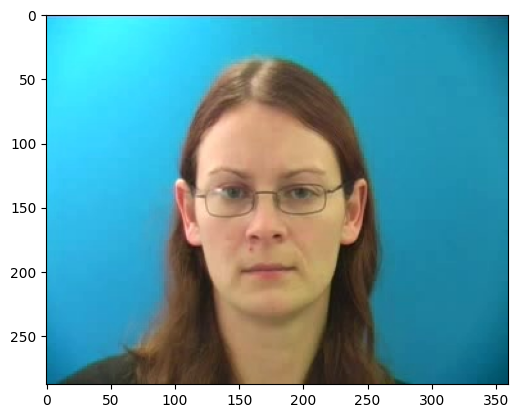

In [19]:
plt.imshow(im)

In [23]:
import numpy as np


In [24]:
r=np.load("/ssd_scratch/cvit/souvikg544/gridcorpus/landmarks/s10/swbz3s/1_landmark.npy")
b=np.load("/ssd_scratch/cvit/souvikg544/gridcorpus/landmarks/s10/swbz3s/1_blend.npy")

In [30]:
r1=np.load("/ssd_scratch/cvit/souvikg544/gridcorpus/landmarks/s10/swbz3s/2_landmark.npy")

In [31]:
r.shape

(478, 3)

In [33]:
r1.shape

(478, 3)

In [34]:
r1==r

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       ...,
       [False, False, False],
       [False, False, False],
       [False, False, False]])

In [35]:
b1=np.load("/ssd_scratch/cvit/souvikg544/gridcorpus/landmarks/s10/swbz3s/2_blend.npy")

In [36]:
b==b1

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [28]:
b.shape

(52,)

In [29]:
b

array([2.02545039e-06, 1.69997439e-01, 2.06334859e-01, 6.68385066e-04,
       2.11838745e-02, 8.12288746e-03, 5.05759854e-05, 1.83743381e-07,
       2.55543114e-07, 3.55624855e-02, 3.80766727e-02, 3.25327031e-02,
       3.58113013e-02, 1.30875381e-02, 1.79976627e-01, 1.85358122e-01,
       2.31544282e-02, 2.23798513e-01, 2.18716323e-01, 4.64953303e-01,
       3.36105853e-01, 1.57676730e-02, 7.69373262e-03, 1.52294349e-04,
       2.43238430e-03, 2.34436616e-01, 3.79409001e-04, 7.44781569e-02,
       9.25837725e-04, 3.58459190e-03, 1.73696448e-04, 1.71171851e-04,
       5.59728267e-03, 4.14326933e-04, 4.13180096e-03, 3.61175882e-03,
       1.57290474e-02, 2.44074110e-02, 2.85139401e-02, 1.89204304e-03,
       6.60702493e-03, 3.07439547e-02, 1.51094806e-03, 2.05591321e-03,
       2.17480527e-04, 2.52913451e-04, 8.08836194e-04, 1.16015156e-03,
       4.88903133e-05, 8.79397412e-05, 3.51449927e-07, 6.34863397e-07])

In [1]:
import cv2
import os
import shutil

for j in range(1,35,1):
    if(j==21):
        continue

    print(f"----------------------------------- Speaker {j} --------------------------------------")
    for files in os.listdir(f"/ssd_scratch/cvit/souvikg544/gridcorpus/landmarks/s{j}"):
        
       
        folder_path=os.path.join(f"/ssd_scratch/cvit/souvikg544/gridcorpus/landmarks/s{j}",files)
        align_path=os.path.join(f"/ssd_scratch/cvit/souvikg544/gridcorpus/transcription/s{j}",f"{files}.align")
    
        # cap.release()
        if not os.path.exists(align_path):
            shutil.rmtree(folder_path)
            continue
        align_data = []
        with open(align_path, 'r') as align_file:
            for line in align_file:
                _,timestamp, label = line.strip().split()
                label=label.lower()
                if(label=="sil"):
                    continue
                align_data.append(label)
        
        i=150
        file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        if ((file_count != i) or (len(align_data)!=6)):
            shutil.rmtree(folder_path)
            print(f"{folder_path} ---- file count ---{file_count} ----- opencv count {i}  ---len{len(align_data)}")

----------------------------------- Speaker 1 --------------------------------------
----------------------------------- Speaker 2 --------------------------------------
----------------------------------- Speaker 3 --------------------------------------
----------------------------------- Speaker 4 --------------------------------------
----------------------------------- Speaker 5 --------------------------------------
----------------------------------- Speaker 6 --------------------------------------
----------------------------------- Speaker 7 --------------------------------------
----------------------------------- Speaker 8 --------------------------------------
----------------------------------- Speaker 9 --------------------------------------
----------------------------------- Speaker 10 --------------------------------------
----------------------------------- Speaker 11 --------------------------------------
----------------------------------- Speaker 12 ----------------

In [20]:
# Target are to be padded

import torch
import torch.optim as optim
import torch.nn as nn

T = 75      # Input sequence length
C = 52      # Number of classes (including blank)
N = 512      # Batch size
S = 6      # Target sequence length of longest target in batch (padding length)
S_min = 10  # Minimum target length, for demonstration purposes
# Initialize random batch of input vectors, for *size = (T,N,C)

input = torch.randn(T, N, C).log_softmax(2).detach().requires_grad_()
# Initialize random batch of targets (0 = blank, 1:C = classes)
#input=torch.randn(T, N, C)
target = torch.randint(low=1, high=C, size=(N, S), dtype=torch.long)
input_lengths = torch.full(size=(N,), fill_value=T, dtype=torch.int32)
target_lengths = torch.full(size=(N,), fill_value=6, dtype=torch.int32)
#target_lengths = torch.randint(low=S_min, high=S, size=(N,), dtype=torch.long)
ctc_loss = nn.CTCLoss()
loss = ctc_loss(input, target, input_lengths, target_lengths)
#loss.backward()
print(input.size())
print(target.size())
print(input_lengths)
print(target_lengths)
print(loss)

torch.Size([75, 512, 52])
torch.Size([512, 6])
tensor([75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75,
        75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75,
        75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75,
        75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75,
        75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75,
        75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75,
        75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75,
        75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75,
        75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75,
        75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75,
        75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75,
        75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 7

In [ ]:
# Target are to be un-padded
T = 50      # Input sequence length
C = 20      # Number of classes (including blank)
N = 16      # Batch size
# Initialize random batch of input vectors, for *size = (T,N,C)
input = torch.randn(T, N, C).log_softmax(2).detach().requires_grad_()
input_lengths = torch.full(size=(N,), fill_value=T, dtype=torch.long)
# Initialize random batch of targets (0 = blank, 1:C = classes)
target_lengths = torch.randint(low=1, high=T, size=(N,), dtype=torch.long)
target = torch.randint(low=1, high=C, size=(sum(target_lengths),), dtype=torch.long)
ctc_loss = nn.CTCLoss()
loss = ctc_loss(input, target, input_lengths, target_lengths)
loss.backward()
# Target are to be un-padded and unbatched (effectively N=1)
T = 50      # Input sequence length
C = 20      # Number of classes (including blank)
# Initialize random batch of input vectors, for *size = (T,C)
input = torch.randn(T, C).log_softmax(2).detach().requires_grad_()
input_lengths = torch.tensor(T, dtype=torch.long)
# Initialize random batch of targets (0 = blank, 1:C = classes)
target_lengths = torch.randint(low=1, high=T, size=(), dtype=torch.long)
target = torch.randint(low=1, high=C, size=(target_lengths,), dtype=torch.long)
ctc_loss = nn.CTCLoss()
loss = ctc_loss(input, target, input_lengths, target_lengths)
loss.backward()

In [15]:
input.size()[0]

75

In [17]:
f"{0:.4f}"

'0.0000'

In [1]:
list("_abcdefghijklmopqrstuvwxyz")

['_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [1]:
import torch
import numpy as np
from itertools import groupby

def ctc_beam_search_decoder(probs, blank=0, beam_width=10):
    """
    CTC Beam Search Decoding for PyTorch.

    Args:
        probs (Tensor): The softmax output probabilities for each batch and time step.
        blank (int): Index of the blank label (typically 0).
        beam_width (int): Width of the beam for beam search.

    Returns:
        List of decoded sequences for each batch (list of lists of integers).
    """
    batch_size, T, C = probs.shape  # Batch size, T: Number of time steps, C: Number of classes

    # Initialize the beams for each batch with the empty sequence.
    beams = [[([], 0.0)] * beam_width for _ in range(batch_size)]

    for t in range(T):
        new_beams = [[] for _ in range(batch_size)]

        for b in range(batch_size):
            for beam, beam_score in beams[b]:
                # Extend with the blank label.
                extended_beam = beam + [blank]
                new_beams[b].append((extended_beam, beam_score + np.log(probs[b, t, blank].item())))

                # Extend with the argmax label.
                argmax_label = torch.argmax(probs[b, t, 1:]) + 1  # Exclude the blank label.
                extended_beam = beam + [argmax_label]
                new_beams[b].append((extended_beam, beam_score + np.log(probs[b, t, argmax_label].item())))

                # Extend repetitions of labels.
                if len(beam) > 0 and beam[-1] != blank and beam[-1] == argmax_label:
                    extended_beam = beam + [argmax_label]
                    new_beams[b].append((extended_beam, beam_score + np.log(probs[b, t, argmax_label].item())))

            # Prune and keep the top beam_width beams for this batch.
            new_beams[b].sort(key=lambda x: x[1], reverse=True)
            beams[b] = new_beams[b][:beam_width]

    decoded_sequences = []

    for b in range(batch_size):
        # Select the best path (highest probability) for each batch element.
        best_beam = beams[b][0][0]

        # Remove consecutive duplicates and blanks.
        decoded_sequence = [label for label, _ in groupby(best_beam) if label != blank]

        decoded_sequences.append(decoded_sequence)

    return decoded_sequences

# Example usage:
if __name__ == "__main__":
    # Replace this with your actual softmax output.
    softmax_output = torch.tensor([
        [
            [0.6, 0.2, 0.1, 0.1],  # t = 0
            [0.1, 0.2, 0.6, 0.1],  # t = 1
            [0.1, 0.1, 0.2, 0.6],  # t = 2
        ],
        [
            [0.2, 0.1, 0.6, 0.1],  # t = 0
            [0.1, 0.6, 0.1, 0.2],  # t = 1
            [0.1, 0.2, 0.2, 0.5],  # t = 2
        ]
    ])

    decoded_sequences = ctc_beam_search_decoder(softmax_output)
    print("Decoded Sequences:", decoded_sequences)


Decoded Sequences: [[tensor(2), tensor(3)], [tensor(2), tensor(1), tensor(3)]]


In [2]:
softmax_output.size()

torch.Size([2, 3, 4])

In [3]:
import torch

In [5]:
torch.IntTensor([10,11])

tensor([10, 11], dtype=torch.int32)